[0]	validation_0-error:0.16946	validation_0-logloss:0.56289	validation_1-error:0.29004	validation_1-logloss:0.60494
[1]	validation_0-error:0.13222	validation_0-logloss:0.47339	validation_1-error:0.26840	validation_1-logloss:0.56789
[2]	validation_0-error:0.09125	validation_0-logloss:0.40817	validation_1-error:0.27273	validation_1-logloss:0.54732
[3]	validation_0-error:0.08007	validation_0-logloss:0.35768	validation_1-error:0.27706	validation_1-logloss:0.54047
[4]	validation_0-error:0.08007	validation_0-logloss:0.32878	validation_1-error:0.28571	validation_1-logloss:0.53443
[5]	validation_0-error:0.06890	validation_0-logloss:0.29806	validation_1-error:0.28571	validation_1-logloss:0.53022
[6]	validation_0-error:0.05214	validation_0-logloss:0.26786	validation_1-error:0.25974	validation_1-logloss:0.53074
[7]	validation_0-error:0.04469	validation_0-logloss:0.24545	validation_1-error:0.27273	validation_1-logloss:0.53112
[8]	validation_0-error:0.03911	validation_0-logloss:0.22625	validation_1

/home/nahuel/.local/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13]	validation_0-error:0.01862	validation_0-logloss:0.16981	validation_1-error:0.25108	validation_1-logloss:0.56098
[14]	validation_0-error:0.01303	validation_0-logloss:0.16324	validation_1-error:0.25974	validation_1-logloss:0.56764
[15]	validation_0-error:0.01117	validation_0-logloss:0.15725	validation_1-error:0.26840	validation_1-logloss:0.57375
[16]	validation_0-error:0.00745	validation_0-logloss:0.14950	validation_1-error:0.26407	validation_1-logloss:0.58119
[17]	validation_0-error:0.00559	validation_0-logloss:0.14381	validation_1-error:0.25974	validation_1-logloss:0.58321
[18]	validation_0-error:0.00559	validation_0-logloss:0.13797	validation_1-error:0.25974	validation_1-logloss:0.58107
[19]	validation_0-error:0.00372	validation_0-logloss:0.13348	validation_1-error:0.25974	validation_1-logloss:0.58389
[20]	validation_0-error:0.00372	validation_0-logloss:0.12943	validation_1-error:0.26840	validation_1-logloss:0.58580
[21]	validation_0-error:0.00372	validation_0-logloss:0.12591	val

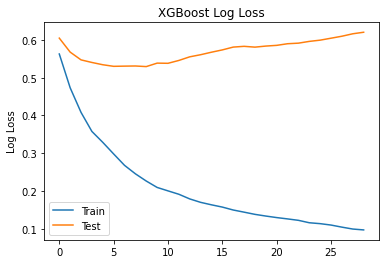

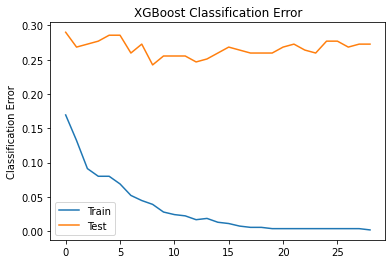

In [11]:
# plot learning curve
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# load data
dataset = loadtxt('./prueba.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# fit model no training data
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=20, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.title('XGBoost Classification Error')
pyplot.show()